In [29]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv("credit_score.csv")

features = ['INCOME', 'DEBT', 'R_EXPENDITURE', 'R_ENTERTAINMENT', 'CAT_GAMBLING']
X = df[features].copy()

X['GAMBLING_LOW'] = X['CAT_GAMBLING'].apply(lambda x: 1 if x=='Low' else 0)
X['GAMBLING_HIGH'] = X['CAT_GAMBLING'].apply(lambda x: 1 if x=='High' else 0)
X.drop(columns=['CAT_GAMBLING'], inplace=True)

y = df['CREDIT_SCORE']

In [12]:
model = xgb.XGBRegressor(objective="reg:squarederror", max_depth=3, n_estimator=100)
model.fit(X,y)

/home/hc/anaconda3/envs/xgb/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:18:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=100, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Text(0.5, 0, ' Actual ')

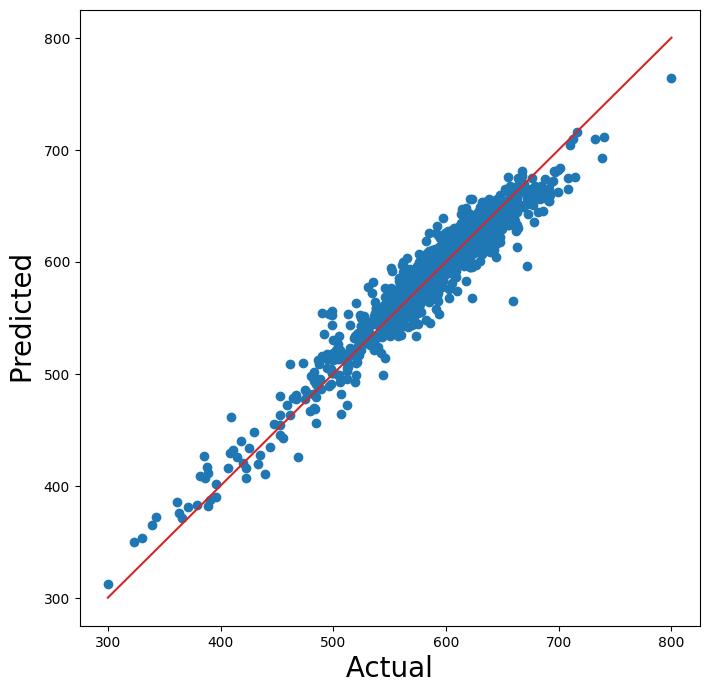

In [26]:
y_pred = model.predict(X)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))

plt.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], color='tab:red')

plt.ylabel('Predicted', size =20)
plt.xlabel('Actual',size =20)

In [28]:
baseline_score = model.score(X, y)
baseline_score

0.9300410747528076

In [38]:
X_perm = X.copy()
X_perm['R_EXPENDITURE'] = np.random.permutation(X_perm['R_EXPENDITURE'])

y_predict = model.predict(X_perm)


In [39]:
permuted_score = model.score(X_perm , y)
permuted_score

0.7802824974060059

In [ ]:
def get_perm_importance(model, X, y, features, n=10):
